# _Note: This is essentially the same as PhysPy-wk13_2015, but with more explanatory cells added_

# Topics


## 1. Image Manipulation -- back to some unresolved issues 
###     i)   arctan2 vs. arctan
###     ii)  Explain numpy.column_stack()
###     iii)  What xy is in the function for warp()


## i) np.arctan() vs np.arctan2()

In [1]:
'''np.arctan(y/x) only gives angles beween -90 and +90.

depending on the sign of (y/x).  If (y/x) < 0, it doesn't make the distinction  

between whether x < 0 or y < 0.  Put it another way, it doesn't know 

about 2nd and 3rd quandrants.
'''

import numpy as np

x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
ang = np.arctan(y/x) * 180. / np.pi
print ang

[ 45. -45.  45. -45.]


In [2]:
'''
np.arctan2(y, x) is much more intelligent...

But note the syntactical difference between np.arctan and np.arctan2.

I would recommend to exclusively use np.arctan2() to avoid possible 
mis-identification of quadrants.

'''

import numpy as np

x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
ang2 = np.arctan2(y, x) * 180 / np.pi
print ang2

[-135.  -45.   45.  135.]


## ii) Difference between np.concatenate(), np.column_stack(), np.row_stack()

In [3]:
a = np.arange(10)
b = np.arange(10)*2
print 'a:', a
print 'b:', b

# note the argument should be a tuple
concat = np.concatenate( (a, b) )
print 'concat shape', concat.shape
print 'concat:', concat

# the argument also should be a tuple
col_stak = np.column_stack( (a, b) )
print 'col_stack shape:', col_stak.shape
print 'col_stack:\n', col_stak


a: [0 1 2 3 4 5 6 7 8 9]
b: [ 0  2  4  6  8 10 12 14 16 18]
concat shape (20,)
concat: [ 0  1  2  3  4  5  6  7  8  9  0  2  4  6  8 10 12 14 16 18]
col_stack shape: (10, 2)
col_stack:
[[ 0  0]
 [ 1  2]
 [ 2  4]
 [ 3  6]
 [ 4  8]
 [ 5 10]
 [ 6 12]
 [ 7 14]
 [ 8 16]
 [ 9 18]]


## Tiny Breakout: Is there a np.row_stack?  

## And if so, what's the relationship between the results of column_stack() and row_stack() performed on the same two arrays?


## Try it out!

In [4]:
'''Breakout Solution'''
# the argument also should be a tuple
row_stak = np.row_stack( (a, b) )
print 'row_stack shape:', row_stak.shape
print 'row_stak:\n', row_stak

#print "column_stack and row_stack are transposes of each other:", (row_stak == col_stak.T)
# A better way: use the .all() method -- it evaluates to false if any of the elements is false
print "column_stack and row_stack are transposes of each other:", (row_stak == col_stak.T).all()

row_stack shape: (2, 10)
row_stak:
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]]
column_stack and row_stack are transposes of each other: True


In [5]:
# Try out .all()
a = np.array([0, 0])
b = np.array([0, 1])
print a == b
print (a == b).all()

[ True False]
False


##     iii)  What xy is in the function for warp()



## In the cell below xy contains all possible pairs of coordinates (x, y).  
## So for a 64x64 image, xy is
    
###    (0, 0)
###    (0, 1)
###    (0, 2)
###    .
###    .
###    .
###    (0, 63)

###    Then 
###    (1, 0)
###    (1, 1)
###    (1, 2)
###    .
###    .
###    .
###    (1, 63)

###    And finally 
###    (63, 0)
###    (63, 1)
###    (63, 2)
###    .
###    .
###    .
###    (63, 63)
    
## Thus xy is a 64^2 x 2, or 4096x2 array.


## Mini-breakout: Given two arrays

a = np.arange(5)

b = np.arange(5)

## Build an array that is 25x2 and contains all possible combinations of the elements in a and b.


## Breakout 1: Understanding what numpy.meshgrid() does.

## Given

x = np.arange(10)

y = np.arange(10)


## Use meshgrid() to create X and Y, and then take the transpose of each.  Now X and Y are 2D coordinates in the form of a 2D array (or a 10x10 grid).

## Print out the element of X and Y at the following indices: first index is i = 2 and second index is j = 7.  What do you expect?

## Mini Breakout:
## Build the functionality of meshgrid() out of column_stack() and row_stack(): That is, given 

x = np.arange(10)
y = np.arange(10)

## build X and Y as in above.

## Summary: We have talked about 

## - numpy.concatenate()

## - numpy.column\_stack()

## - numpy.row\_stack()

## - how to make a N^2 x 2 array that contains all possible coordinate pairs in a NxN space.

## - numpy.meshgrid()

## ...and the relationships among them.

## Now, let's at the fisheye example again.

## First let's make a smaller image.

[256, 256]


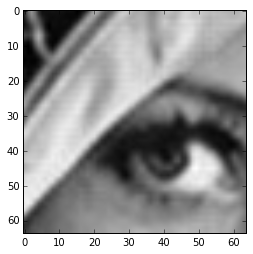

In [21]:
%matplotlib inline

'''
Cut out the central part of the lena image
'''

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage import transform, data, io



lena = mpimg.imread('lena512.jpg')
ctr = [lena.shape[0]/2, lena.shape[1]/2] 


# following block: select the central 64x64 pixels
pix_num = 32
print ctr
lena_eye = lena[ctr[0] - pix_num : ctr[0] + pix_num, ctr[1] - pix_num : ctr[1] + pix_num]
plt.figure()
plt.imshow(lena_eye, cmap = plt.cm.gray)
plt.show()


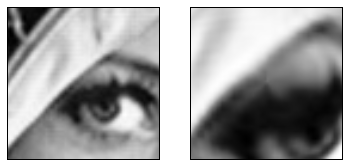

In [7]:
'''

Note: I have added two keyword arguments to fisheye(): a and b

'''
def fisheye(xy, a = 2.1, b = 1.8):
    
    '''
    xy are the coordinates distilled from the image.  
    
    If the image is n x n, then xy is n^2 x 2.
    
    Reference:
    
    http://scikit-image.org/docs/dev/api/skimage.transform.html
    
    Source code:
    
    https://github.com/scikit-image/scikit-image/blob/master/skimage/transform/_geometric.py#L1171
    
    '''
    
    # The of meaning of mean: If the xy is (4096, 2) then take average along the direction 
    # of 4096.
    # Thus center is a 2-element array -- not the most efficient way: 
    # one only needs to go through 64 elements to find the average of x or y.
    # But it works.
    center = np.mean(xy, axis=0)
    xc, yc = (xy - center).T

    # advantage of ipdb over pdb: remembers history.
    #import ipdb; ipdb.set_trace()
    # In ipdb, do
    # p xy.shape
    # p xy
    # p center
    # p xc.shape
    # p xc

    # Polar coordinates
    r = np.sqrt(xc**2 + yc**2)
    theta = np.arctan2(yc, xc)

    r = 0.8 * np.exp(r**(1/a) / b)

    # returns an array with the same dimension as the input xy: 4096x2.
    # which then gets associated with the image array.
    return np.column_stack((r * np.cos(theta), r * np.sin(theta))) + center

# Note how the arguments to fisheye() were specified.
out = transform.warp(lena_eye, inverse_map = fisheye, map_args = {'a': 2.1, 'b': 1.8})
# Now try this 
#out = transform.warp(lena_eye, inverse_map = fisheye, map_args = {'a': 2., 'b': 1.5})

# The statement, f, (ax, ax1) = ... creates a figure and two subplots, 
# or in matplotlib parlance, "axes".
# xticks = [] makes the xticks go away.
f, (ax0, ax1) = plt.subplots(1, 2, subplot_kw=dict(xticks=[], yticks=[]))
ax0.imshow(lena_eye, cmap = plt.cm.Greys_r)
ax1.imshow(out, cmap = plt.cm.Greys_r)

plt.show()

## Breakout 3

## Write a function that rotates an image by a given angle, theta: 

## rotate(xy, theta = np.pi/2, blowup = 1.)


### Using

##  x_rot = x\*cos(theta) - y\*sin(theta)
##  y_rot = x\*cos(theta) - y\*sin(theta)

## Remember just as in fisheye(), x and y are measured from the center of the image.

## Two keyword arguments:

## - theta
## - blowup: can be used to enlarge or shrink the image



In [8]:
'''
plt.clf() clears the plot

'''

import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(10))
## gets rid of the figure created by plt.plot
plt.clf()


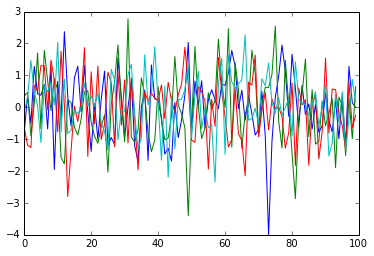

In [9]:
%matplotlib inline
'''

Unfortunately, plt.plot() appears only after the end of the cell...
which means you can't dynamically change your plot.

'''
import matplotlib.pyplot as plt
from IPython import display
import time
for i in range(4):
    plt.plot(np.random.randn(100))

    #time.sleep(1)
    #plt.clf()

    

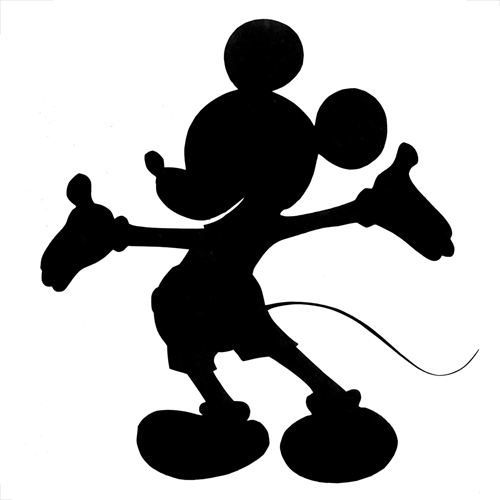

In [10]:
'''

Introducing IPython.display module:

The display() function is a general purpose tool for displaying different representations of objects. 
Think of it as print for these rich representations.

display.clear_output() clears a figure made by display().

'''
import IPython.display as display
from IPython.display import Image
mickey = Image(filename = 'whatsthis.png')
display.display(mickey)
#display.clear_output()

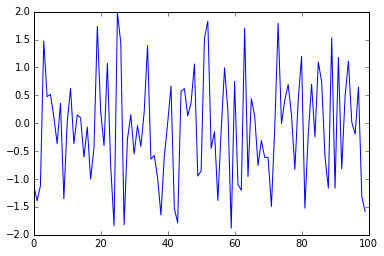

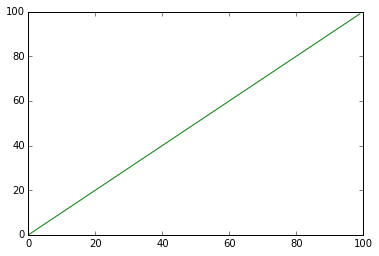

In [11]:
'''

In this cell, plt.plot() is used to make the figure, and display.display() is
used to show the figure at the time we want.

'''

import matplotlib.pyplot as plt
from IPython import display
import time

#makes figure1
plt.plot(np.random.randn(100))

#makes figure1 again
fig = plt.gcf()
display.display(fig)

# gets rid of the figure1 created by plt.plot
# but the figure1 created by display is still there.
plt.clf()

# makes figure2    
plt.plot(np.arange(100), 'g-')

# # gets rid of the figure1 created by display
# # wait = True means don't get rid of the old figure unless there is a new figure
# display.clear_output(wait=True)

# #makes figure2 again
# fig = plt.gcf()
# display.display(fig)

# #gets rid of figure2 created by plt.plot
# #plt.clf()


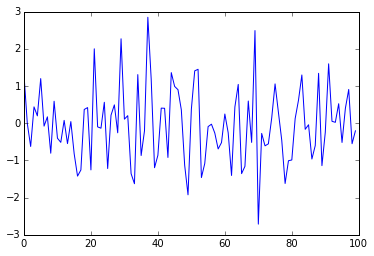

In [12]:
%matplotlib inline
'''

Put everything in a for loop...

'''
import matplotlib.pyplot as plt
from IPython import display
import time
for i in range(4):
    plt.plot(np.random.randn(100))
    display.clear_output(wait=True)    
    fig = plt.gcf()
    
    display.display(fig)
    # note: the last figure created by display hasn't been removed
    # the last figure created by plt.plot is removed by plt.clf()
    plt.clf()



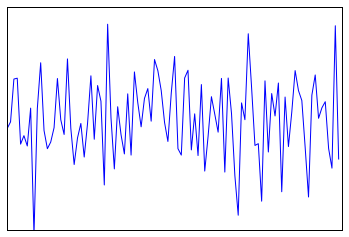

In [13]:
%matplotlib inline
'''
Making it look nicer

'''
import matplotlib.pyplot as plt
from IPython import display
import time
for i in range(10):
    plt.plot(np.random.randn(100))
    plt.ylim([-3, 3])
    ax = plt.gca()   
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    # clear_output() removes the figure altogether -- 
    # try running with this line blocked.
    # wait = True: keep the figure until the next figure shows up.
    display.clear_output(wait=True)
        
    fig = plt.gcf()
    display.display(fig)
    plt.clf()
    


## Breakout 4

## Write a function, rot_movie(im, nframes = 24)

## that can take an image to do this:

## - First just do the rotation part.

## - Then add the size change part.


## There is a bette way to do a movie 
## -- we will talk about that in Computational Physics II
### (One hint: you make the images and then save them first, and THEN make a movie out of them.)

## End of Week 13, Lecture 2